### Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),
    pd.read_csv('/datasets/orders_info_short.csv'),
    pd.read_csv('/datasets/costs_info_short.csv')
)

In [3]:
visits.head()
# выведем первые 5 строк датафрейма с посещениями пользователей на экран

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()
# общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Пропусков нет. Переименуем названия колонок, а также изменим тип данных для колонок с началом и окончанием сессии.

In [5]:
visits.columns=['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
# переименование колонок

In [6]:
visits.duplicated().sum()
# проверка наличия явных дубликатов в данных

0

In [7]:
orders.head()
# выведем первые 5 строк датафрейма с заказами на экран

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
orders.info()
# общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Пропусков нет. Переименуем названия колонок, а также изменим тип данных для колонки с датой события.

In [9]:
orders.columns=['user_id', 'event_dt', 'revenue']
# переименование колонок

In [10]:
orders.duplicated().sum()
# проверка наличия явных дубликатов в данных

0

In [11]:
costs.head()
# выведем первые 5 строк датафрейма с затратами на экран

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропусков нет. Переименуем названия колонок, а также изменим тип данных для колонки с датой.

In [13]:
costs.columns=['dt', 'channel', 'costs']
# переименование колонок

In [14]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
# преобразование данных о времени

In [15]:
costs.duplicated().sum()
# проверка наличия явных дубликатов в данных

0

**Выводы:**
* Исходные датафреймы содержат данные о данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
    * лог сервера с данными об их посещениях;
    * выгрузка их покупок за этот период;
    * рекламные расходы.
* Предварительная обработка данных не выявила пропусков и дубликатов. Были произведены изменения типов данных для столбцов, содержащих даты. Также названия столбцов были приведены в соответствие с "хорошим стилем".

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [16]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [17]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [18]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [19]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [20]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [21]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [22]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [23]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу.

In [24]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [25]:
# определяем минимальную и максимальную даты привлечения пользователей

min_date = (pd.to_datetime(profiles['first_ts']).dt.date).min()
max_date = (pd.to_datetime(profiles['first_ts']).dt.date).max()

print('Минимальная дата привлечения пользователей:', min_date)
print('Максимальная дата привлечения пользователей:', max_date)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


**Выводы:**
* Минимальная дата привелечения пользователей - **1 мая 2019 года**;
* Максимальная дата привлечения пользователей - **27 октября 2019 года**.

In [26]:
# функция для построения сводных таблиц, отражающую количество пользователей и долю платящих из каждой страны.
def get_profiles_pivot(profiles, dimension):
    
    profiles_pivot=profiles.groupby(dimension).agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
    profiles_pivot['payer_count']=(
        profiles.query('payer == True').groupby(dimension).agg({'user_id': 'nunique'})
    )
    profiles_pivot['payer_%'] = profiles_pivot['payer_count']/profiles_pivot['user_id']*100
    profiles_pivot=profiles_pivot.sort_values(by='payer_%', ascending=False).style.format({'payer_%': '{:.1f}%'})
    return profiles_pivot

In [27]:
profiles_region=get_profiles_pivot(profiles, 'region')
profiles_region

,user_id,payer_count,payer_%
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


**Выводы:**
* Наибольшее количество пользователей приходится на **США** - около **100 тыс. чел.**;
* Наибольшее число платящих пользователей приходится также на **США** - почти **7 тыс. чел.**;
* При этом доля платящих пользователей у **США** всего **7%**, что не намного больше, чем у остальных стран. Хотя в абсолютных значениях перевес значительный.

In [28]:
profiles_devices=get_profiles_pivot(profiles, 'device')
profiles_devices

,user_id,payer_count,payer_%
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


**Выводы:**
* Наибольшее количество привлеченных пользователей используют **iPhone** - около **55 тыс. чел.**;
* Наибольшее число платящих пользователей приходится также на пользователей **iPhone** - почти **3 400 чел.**, однако доля платящих пользователей у обладателей **Mac** немног выше, чем у пользователей **iPhone** -  **на 0.2%**.

In [29]:
profiles_channel=get_profiles_pivot(profiles, 'channel')
profiles_channel

,user_id,payer_count,payer_%
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


**Выводы:**
* Наибольшее количество пользователей пришли из каналов **FaceBoom** и **TipTop**;
* Наибольшая доля платящих пользователей наблюдается для таких каналов привлечения, как **FaceBoom, AdNonSense, lambdaMediaAds и TipTop**;
* Наименьшая доля платящих у органических пользователей - всего **2.1%**.

**Промежуточные выводы:**
* Составили профили пользователей. Определили минимальную (1 мая 2019 года) и максимальную (27 октября 2019 года) даты привлечения пользователей.
* Проведенный анализ пользовательских профилей показал, что:
    * Наибольшее количество пользователей приходится на **США** - около **100 тыс. чел.**;
    * Наибольшее число платящих пользователей приходится также на **США** - почти **7 тыс. чел.**;
    * Наибольшее количество привлеченных пользователей используют **iPhone** - около **55 тыс. чел.**;
    * Наибольшее число платящих пользователей приходится также на пользователей **iPhone** - почти **3 400 чел.**, однако доля платящих пользователей у обладателей **Mac** немног выше, чем у пользователей **iPhone** -  **на 0.2%**;
    * Наибольшее количество пользователей пришли из каналов **FaceBoom** и **TipTop**;
    * Наибольшая доля платящих пользователей наблюдается для таких каналов привлечения, как **FaceBoom, AdNonSense, lambdaMediaAds и TipTop**;
    * Наименьшая доля платящих у органических пользователей - всего **2.1%**.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [30]:
print('Общая сумма расходов на маркетинг:', round(costs['costs'].sum()))

Общая сумма расходов на маркетинг: 105497


In [31]:
costs_marketing=costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
costs_marketing['costs_%']=round(costs_marketing['costs']/costs_marketing['costs'].sum()*100)
costs_marketing

,costs,costs_%
channel,,
TipTop,54751.30,52.0
FaceBoom,32445.60,31.0
WahooNetBanner,5151.00,5.0
AdNonSense,3911.25,4.0
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,2.0
LeapBob,1797.60,2.0
lambdaMediaAds,1557.60,1.0
MediaTornado,954.48,1.0


**Выводы:**
* Общая сумма расходов на маркетинг: **105 497**
* Больше всего было потрачено на маркетинг на каналах **TipTop** и **FaceBoom** - **83%** от общих затрат.

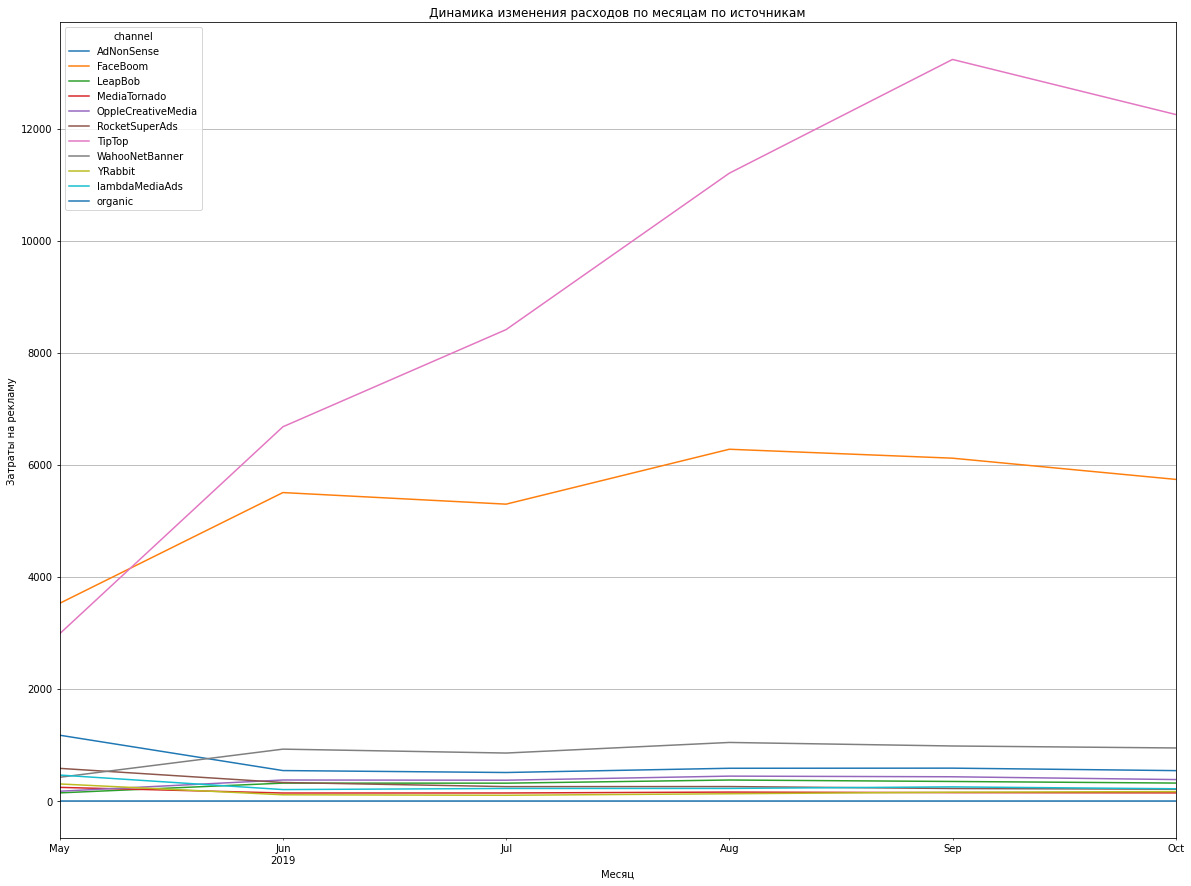

In [32]:
# построим визуализацию динамики изменения расходов во времени по месяцам по каждому источнику

profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(figsize=(20,15), grid=True)

plt.title('Динамика изменения расходов по месяцам по источникам')
plt.xlabel('Месяц')
plt.ylabel('Затраты на рекламу')
plt.show()

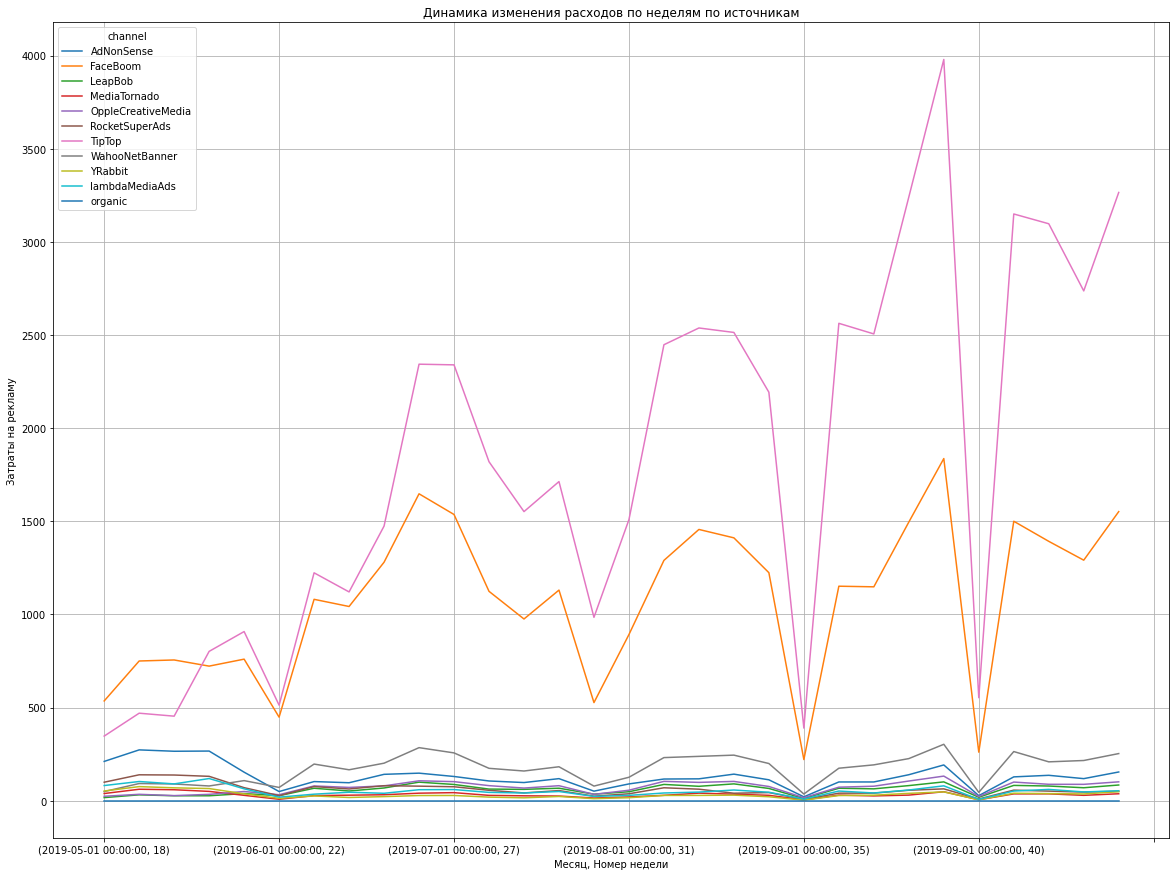

In [33]:
# построим визуализацию динамики изменения расходов во времени по неделям по каждому источнику

profiles['week']=pd.to_datetime(profiles['dt']).dt.isocalendar().week
profiles.pivot_table(
    index=['month', 'week'], columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(figsize=(20,15), grid=True)

plt.title('Динамика изменения расходов по неделям по источникам')
plt.xlabel('Месяц, Номер недели')
plt.ylabel('Затраты на рекламу')
plt.show()

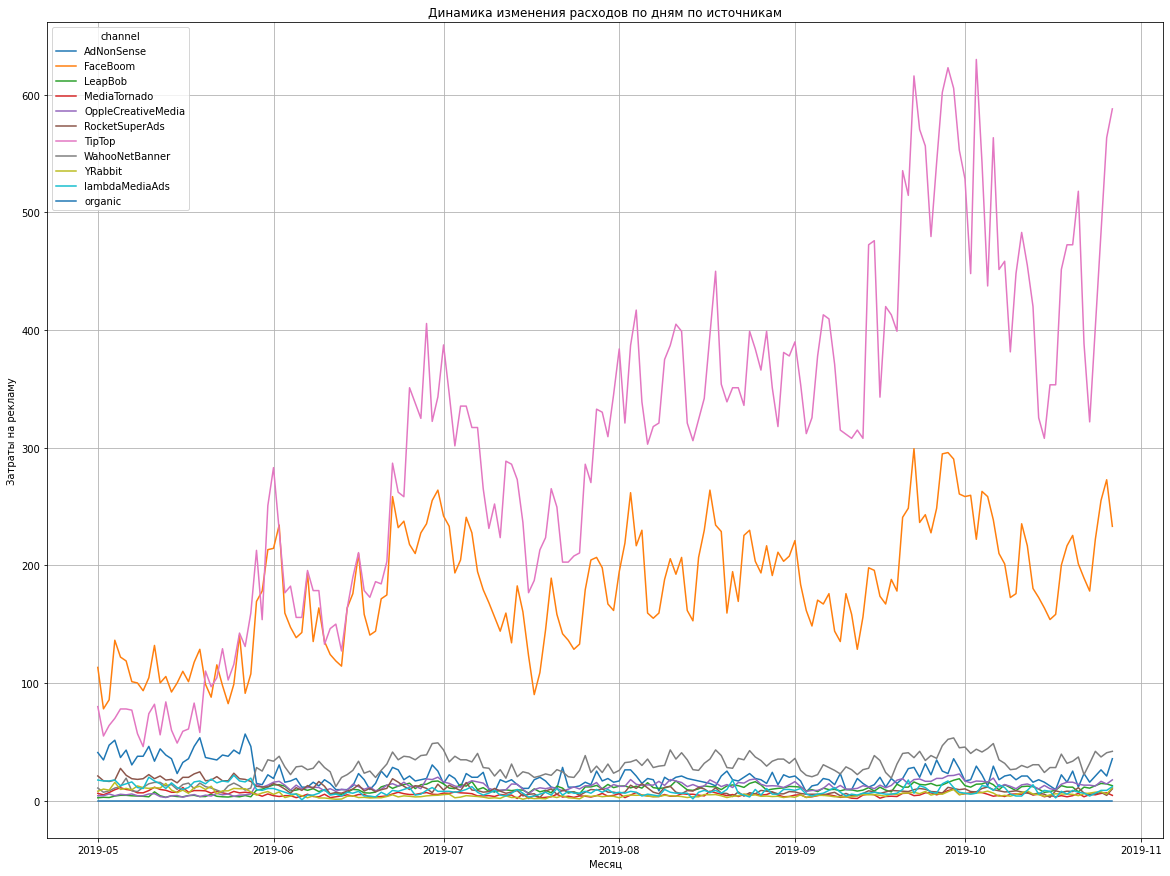

In [34]:
# построим визуализацию динамики изменения расходов во времени по дням по каждому источнику

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(figsize=(20,15), grid=True)

plt.title('Динамика изменения расходов по дням по источникам')
plt.xlabel('Месяц')
plt.ylabel('Затраты на рекламу')
plt.show()

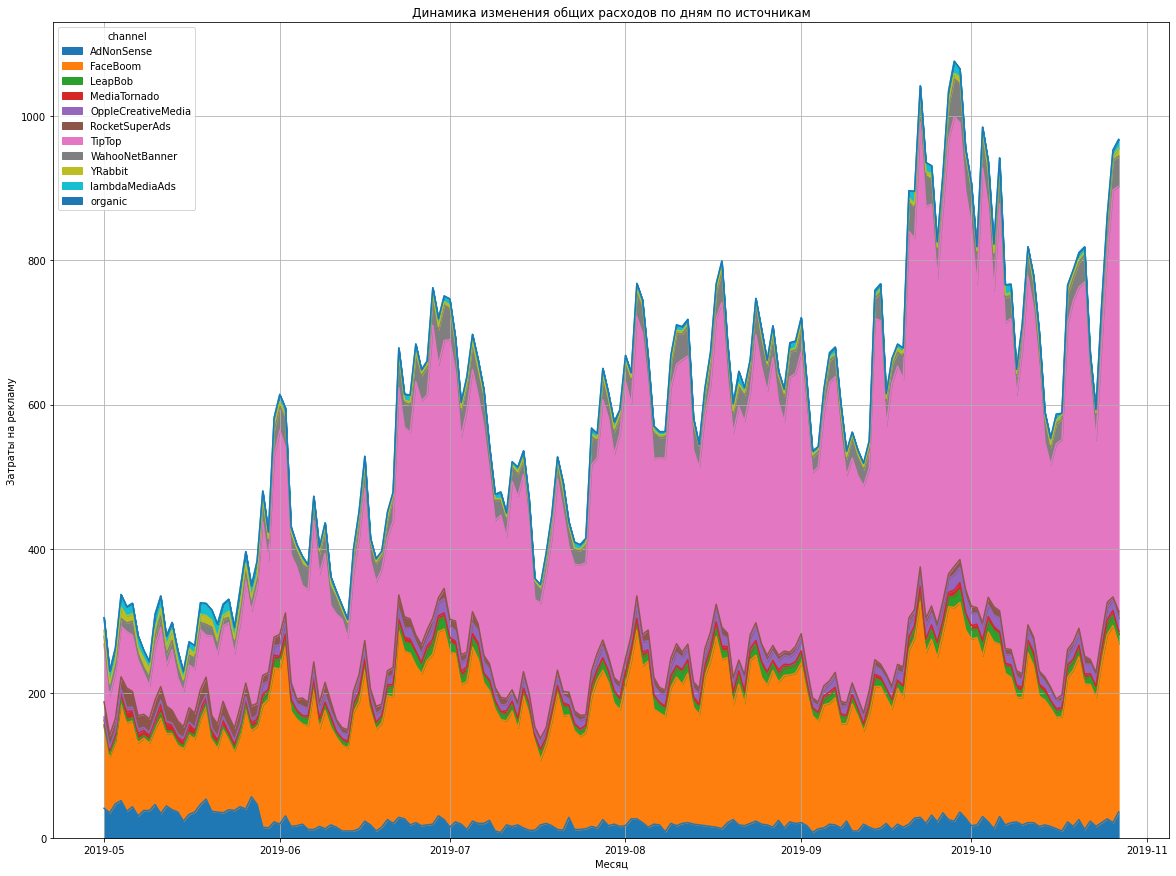

In [35]:
# построим визуализацию динамики изменения общих расходов во времени по дням по каждому источнику

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot.area(figsize=(20,15), grid=True)

plt.title('Динамика изменения общих расходов по дням по источникам')
plt.xlabel('Месяц')
plt.ylabel('Затраты на рекламу')
plt.show()

**Выводы:**
* По всем каналам, кроме **FaceBoom** и **TipTop** динамика изменения расходов отрицательная, либо нулевая;
* Больше всего расходов уходит на рекламные каналы **FaceBoom** и **TipTop**;
* По каналу **TipTop** наблюдается рост расходов в каждом месяце. В октябре наблюдается небольшой спад по причине неполноты данных. При полных данных, скорее всего, динамика будет также положительной;
* По каналу **FaceBoom** наблюдается увеличение расходов с мая по июнь, далее динамика затрат стабилизируется.

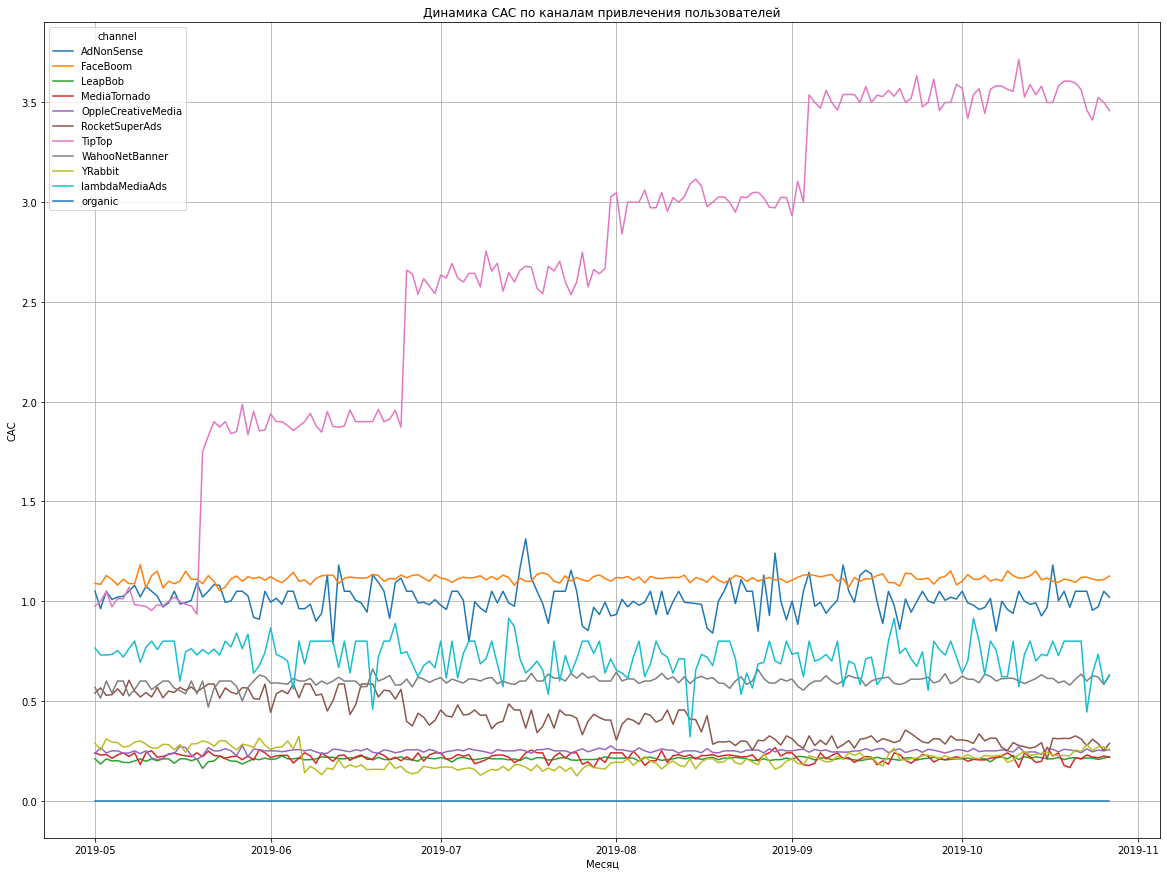

In [36]:
# построим визуализацию динамики CAC на одного пользователя во времени по дням по каждому каналу привлечения
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(figsize=(20,15), grid=True)

plt.title('Динамика CAC по каналам привлечения пользователей')
plt.xlabel('Месяц')
plt.ylabel('CAC')
plt.show()

In [37]:
# посчитаем средний CAC на одного пользователя по каналам привлечения
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).round(2).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
MediaTornado,0.22
YRabbit,0.22


**Выводы:**
* Для всех каналов, кроме **TipTop** средний CAC стабильный и не превышает **1.11**
* Для канала **TipTop** наблюдается рост CAC каждый месяц с мая по октябрь **с 1.0 до 3.5**.
* Наибольший средний CAC за весь период наблюдений у канала **TipTop** - **2.8**
* Наименьший средний CAC - у каналов **OppleCreativeMedia, MediaTornado, YRabbit, LeapBob**

**Промежуточные выводы:**
1. Общая сумма расходов на маркетинг: **105 497**
2. Больше всего было потрачено на маркетинг на каналах **TipTop** и **FaceBoom** - **83%** от общих затрат.
3. По каналу **TipTop** наблюдается рост расходов в каждом месяце. По каналу **FaceBoom** - рост расходов с мая по июнь, далее - динамика стабилизируется.
4. Наибольшая стоимость привлечения пользователей у канала **TipTop**. Наименьшая - у каналов **OppleCreativeMedia, MediaTornado, YRabbit, LeapBob**.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [38]:
# установим момент и горизонт анализа данных
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

In [39]:
# исключим органических пользователей из анализа, т.к. предстоит считать окупаемость рекламы, а привлечение органических пользователей бесплатно
profiles = profiles.query('channel != "organic"')

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

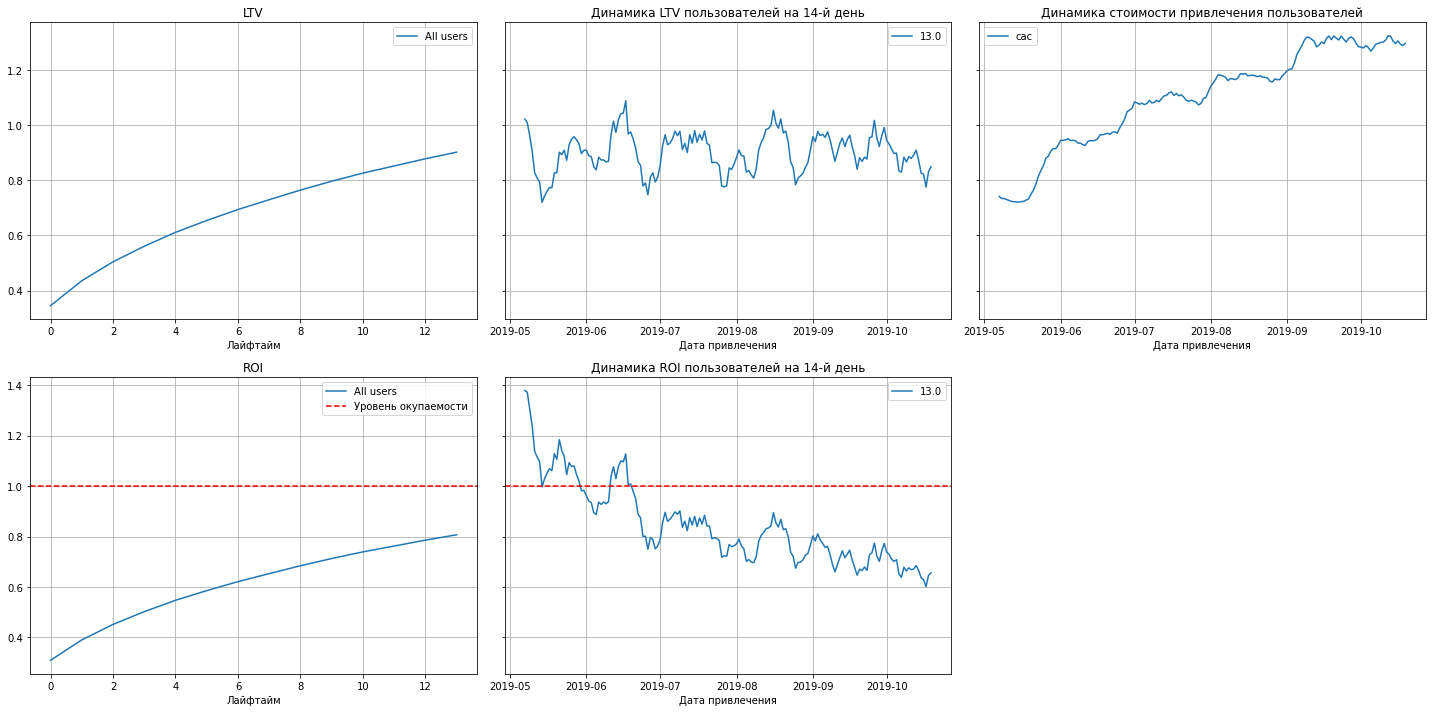

In [40]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Выводы:**
* Расходы на рекламу не окупаются. **ROI** в конце двухнедельного горизонта анализа чуть выше **80%**;
* **CAC** с мая по октябрь неизменно растет;
* **LTV** растет на протяжении двухнедельного периода анализа, но общая динамика стабильна - держится на одном уровне с мая по октябрь;
* Реклама окупается только с мая по июнь, далее - снижение **ROI** до уровня **60-90%**.

Пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

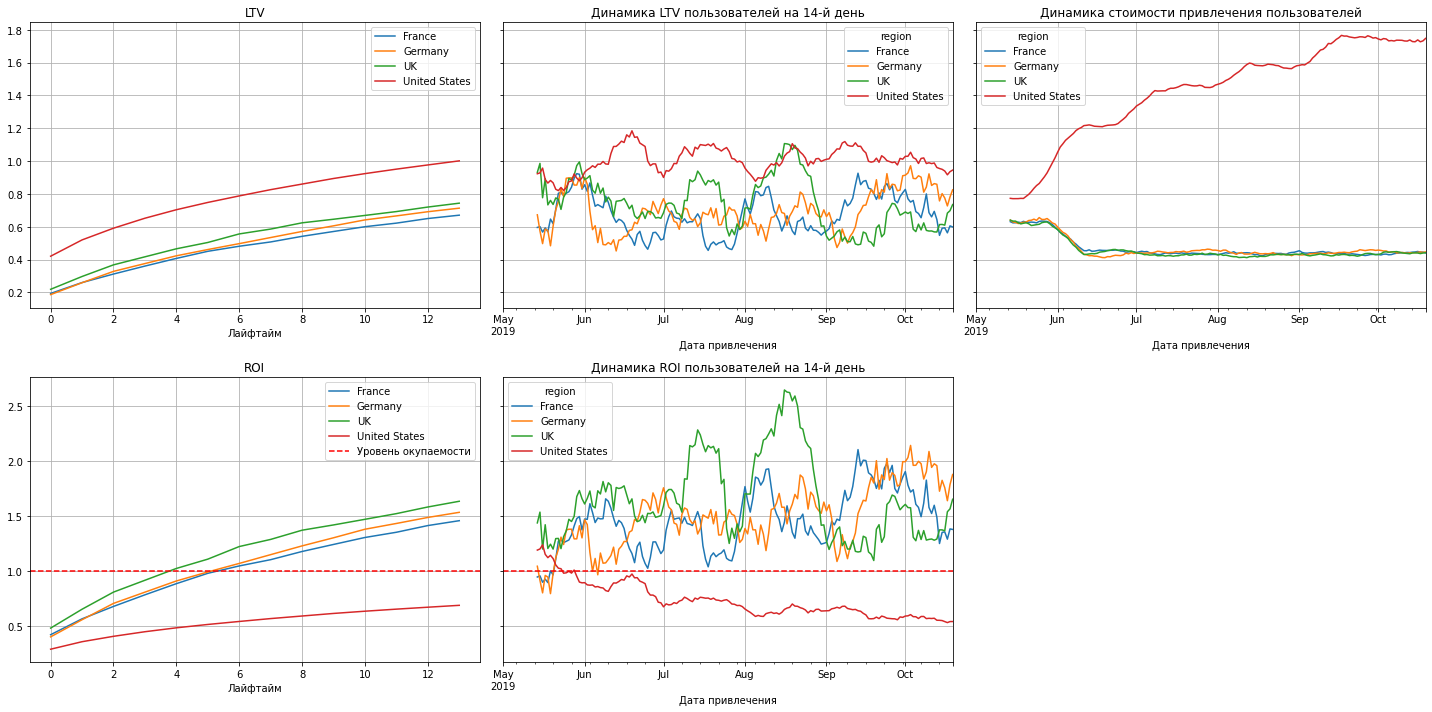

In [41]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**
* **CAC** для всех стран стаблен, кроме **США**. Затраты на привлечение пользователей **США** постоянно растут;
* Единственная страна, для которой привлечение пользователей не окупается - **США**. Даже несмотря на то, что **LTV** пользователей **США** наибольший.

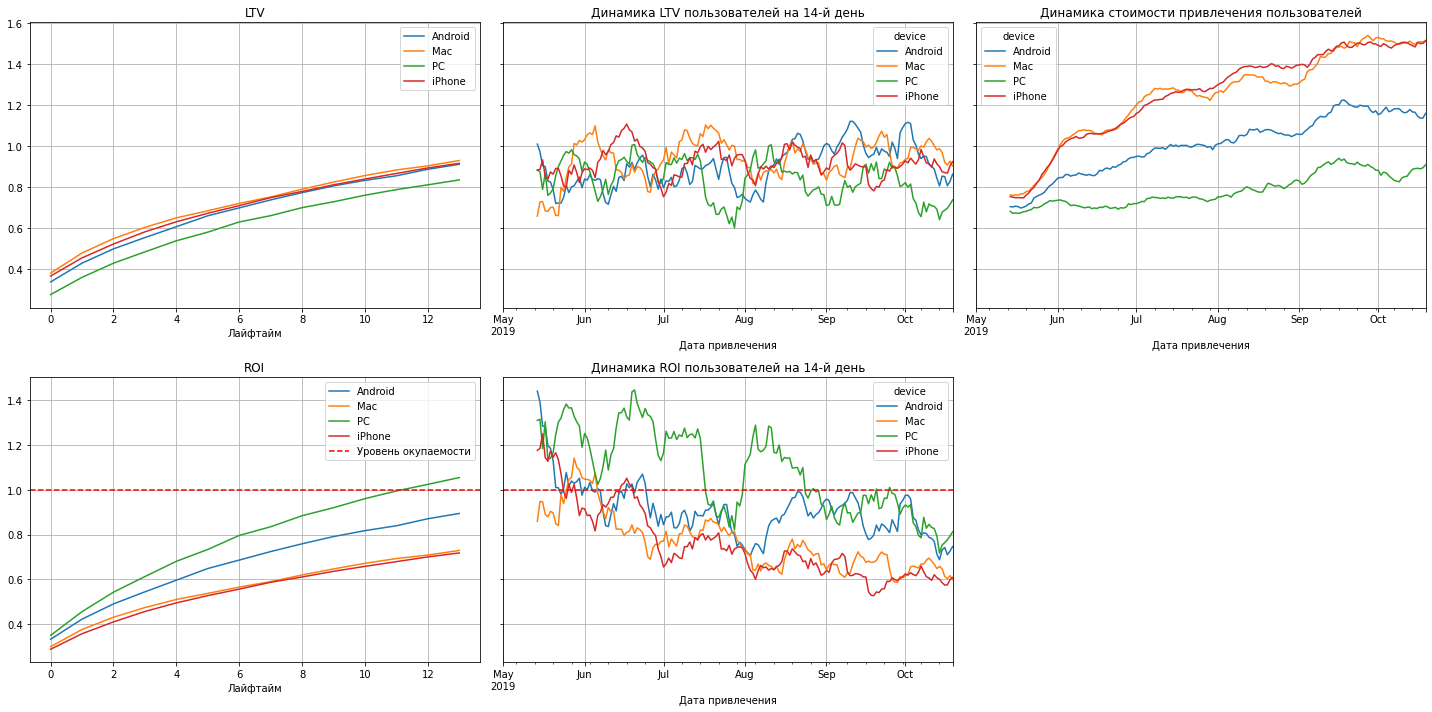

In [42]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы:** 
* С мая по сентябрь окупаются только пользователи **PC**. С сентября по октябрь пользователи **PC** на грани окупаемости, либо вовсе не окупаются. Обладатели других девайсов находятся ниже уровня окупаемости на протяжении всего периода исследования. Худшие показали окупаемости у пользователей **Mac** и **iPhone**; 
* Для всех девайсов **CAC** растет: меньше всего у **PC**, больше всего - у **Mac** и **iPhone**.

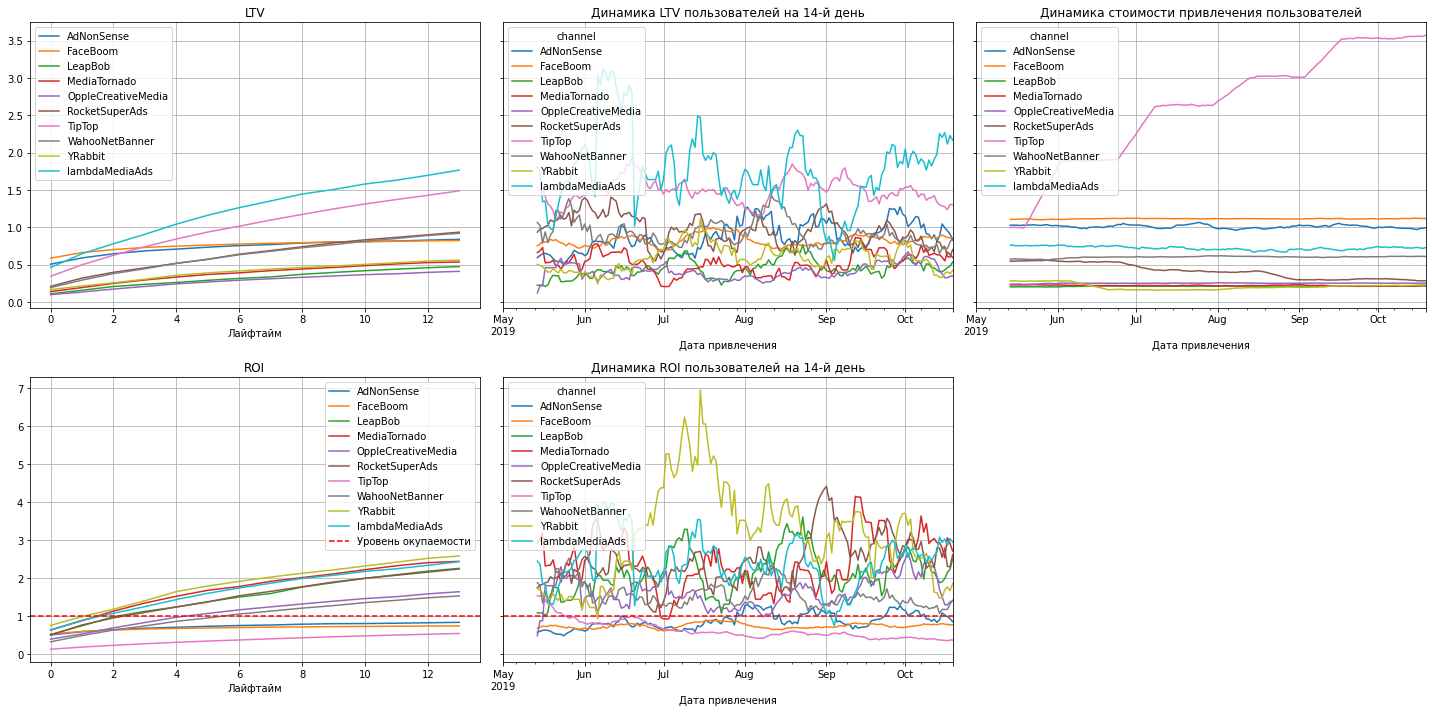

In [43]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Выводы:** 
* Динамика **CAC** стабильная для всех рекламных каналов, кроме **TipTop**, на котором стоимость привлечения пользователей неизменно растет каждый месяц;
* Рекламная кампания крупнейших каналов - **FaceBoom, TipTop** не окупается, несмотря на то, что **LTV** канала **TipTop** один из самых высоких;
* Наивысший **LTV** у канала **lambdaMediaAds**. При этом динамика **ROI** у него также положительная с мая по октябрь;
* Также необходимо присмотреться к каналу **YRabbit**, который показывает наивысший **ROI** в динамике с мая по октябрь.

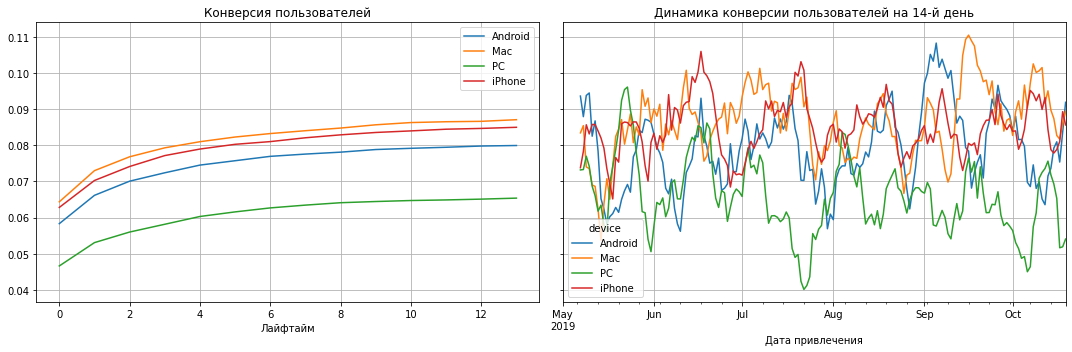

In [44]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Выводы:** 
* Конверсия мобильных устройств и **Mac** стабильно высокая, а у пользователей **PC** - немного проседает.

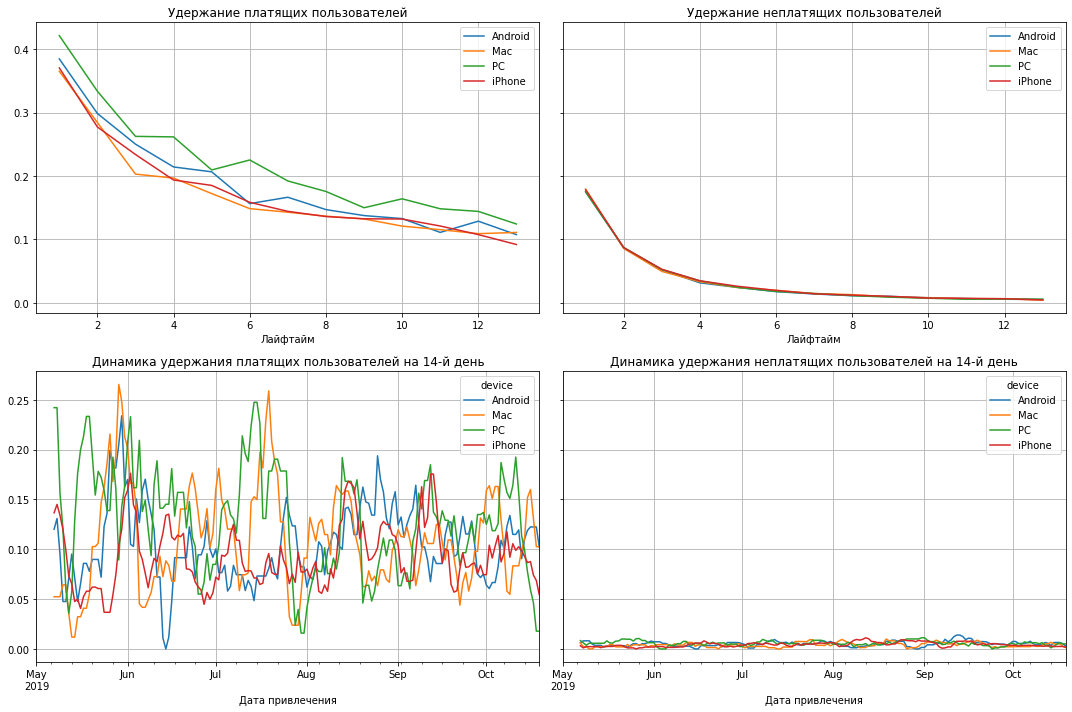

In [45]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы:**
* Динамика удержания практически идентичная для пользователей различных устройств. Явных аномалий нет.

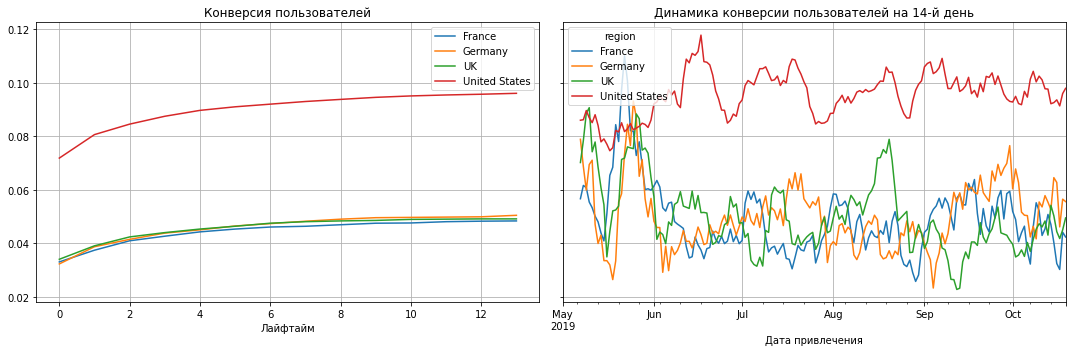

In [46]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Выводы:**
* Пользователи **США** явно лучше конвертируются, чем пользователей других стран. Перевес почти в **2 раза**.

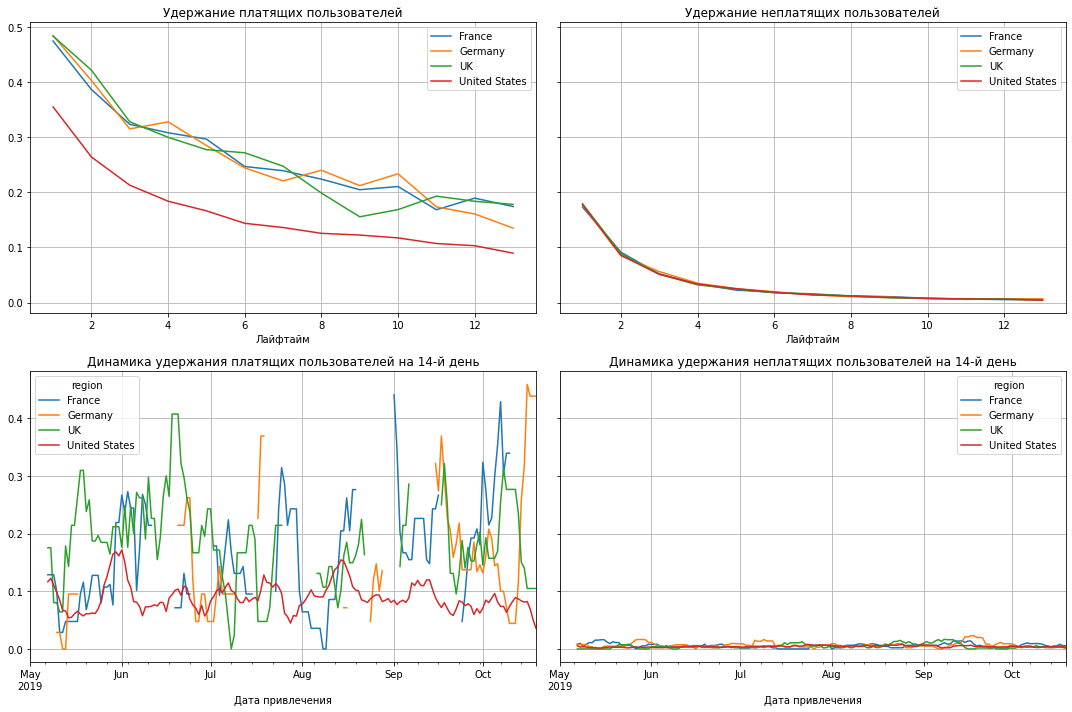

In [47]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы:**
* Несмотря на высокие показатели конверсии, удержание платящих пользователей **США** ниже, чем у пользователей других стран.

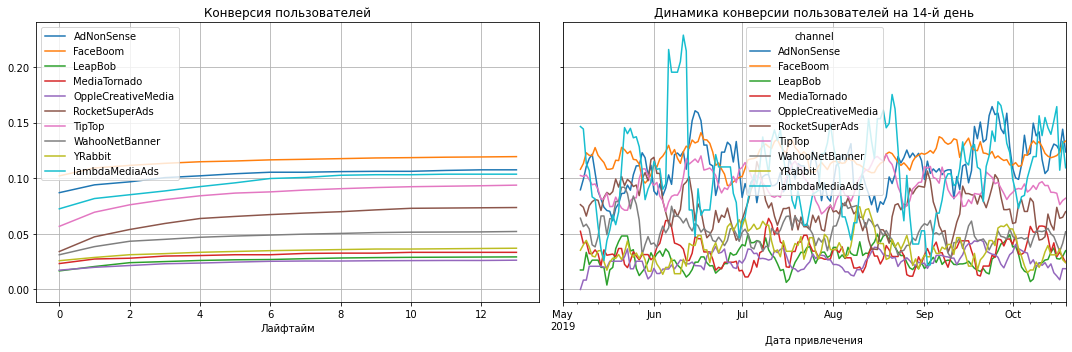

In [48]:
# смотрим конверсию с разбивкой по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Выводы:**
* Самый высокий показатель конверсии - у пользователей, привлеченных с рекламных каналов **FaceBoom, AdNonSense** и **lambdaMediaAds**.

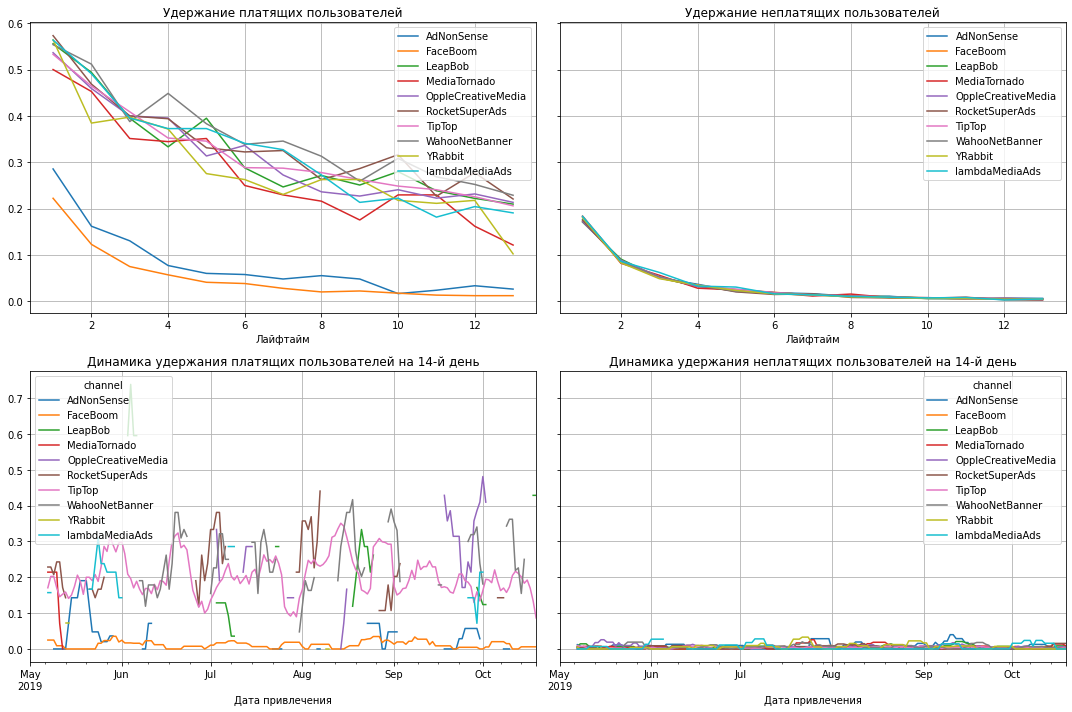

In [49]:
# смотрим удержание с разбивкой по каналам привлечения
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Выводы:**
* Несмотря на высокие показатели конверсии, худшая динамика удержания у пользователей, привлеченных с рекламных каналов **FaceBoom, AdNonSense**.

In [50]:
# построим сводную таблицу, чтобы понять, какие рекламные источники привлекают пользователей США
profiles.pivot_table(
    index='channel', columns='region', values='acquisition_cost', aggfunc='sum'
).round()

region,France,Germany,UK,United States
channel,,,,
AdNonSense,1376.0,1229.0,1306.0,NaN
FaceBoom,NaN,NaN,NaN,32446.0
LeapBob,628.0,530.0,640.0,NaN
MediaTornado,NaN,NaN,NaN,954.0
OppleCreativeMedia,747.0,641.0,763.0,NaN
RocketSuperAds,NaN,NaN,NaN,1833.0
TipTop,NaN,NaN,NaN,54751.0
WahooNetBanner,1789.0,1553.0,1809.0,NaN
YRabbit,NaN,NaN,NaN,944.0


**Выводы:**
* Рекламные источники ориентированы либо на пользователей США, либо на остальных - Франции, Германии, Великобритании;
* Большая часть пользователей США привлекаются из рекламных источников, которые не окупаются - FaceBoom, TipTop.

**Промежуточные выводы:**
1. Если смотреть на картину в целом - реклама, направленная на привлечение пользователей, не окупается. ROI превышает 100%-ное значение только в первый месяц, далее на протяжении всего периода исследования - ниже 100%.
2. Негативное влияние на окупаемость рекламы оказывают:
    * пользователи США;
    * владельцы устройств Mac и iPhone;
    * пользователи, привлеченные из рекламных каналов FaceBoom, TipTop.
3. Проблемы окупаемости вызваны неэффективным распределением бюджета на проведение рекламных кампаний. Наибольшие инвестиции получают рекламные каналы FaceBoom, TipTop, однако ни один из них не окупается.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

**Выводы:**

1. Исходные датафреймы содержали данные о данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
    * лог сервера с данными об их посещениях;
    * выгрузка их покупок за этот период;
    * рекламные расходы.
2. Предварительная обработка данных не выявила пропусков и дубликатов. Были произведены изменения типов данных для столбцов, содержащих даты. Также названия столбцов были приведены в соответствие с "хорошим стилем".
3. Заданы функции для расчёта и анализа LTV, ROI, удержания и конверсии.
4. Составили профили пользователей. Определили минимальную (1 мая 2019 года) и максимальную (27 октября 2019 года) даты привлечения пользователей.
5. Проведенный анализ пользовательских профилей показал, что:
    * Наибольшее количество пользователей приходится на **США** - около **100 тыс. чел.**;
    * Наибольшее число платящих пользователей приходится также на **США** - почти **7 тыс. чел.**;
    * Наибольшее количество привлеченных пользователей используют **iPhone** - около **55 тыс. чел.**;
    * Наибольшее число платящих пользователей приходится также на пользователей **iPhone** - почти **3 400 чел.**, однако доля платящих пользователей у обладателей **Mac** немног выше, чем у пользователей **iPhone** -  **на 0.2%**;
    * Наибольшее количество пользователей пришли из каналов **FaceBoom** и **TipTop**;
    * Наибольшая доля платящих пользователей наблюдается для таких каналов привлечения, как **FaceBoom, AdNonSense, lambdaMediaAds и TipTop**;
    * Наименьшая доля платящих у органических пользователей - всего **2.1%**.
6. Анализ маркетинга показал, что:
    * Общая сумма расходов на маркетинг: **105 497**;
    * Больше всего было потрачено на маркетинг на каналах **TipTop** и **FaceBoom** - **83%** от общих затрат;
    * По каналу **TipTop** наблюдается рост расходов в каждом месяце. По каналу **FaceBoom** - рост расходов с мая по июнь, далее - динамика стабилизируется;
    * Наибольшая стоимость привлечения пользователей у канала **TipTop**. Наименьшая - у каналов **OppleCreativeMedia, MediaTornado, YRabbit, LeapBob**.
7. Большая часть пользователей США привлекаются из рекламных источников, которые не окупаются - FaceBoom, TipTop.
8. Если смотреть на картину в целом - реклама, направленная на привлечение пользователей, не окупается. ROI превышает 100%-ное значение только в первый месяц, далее на протяжении всего периода исследования - ниже 100%.
9. Негативное влияние на окупаемость рекламы оказывают:
    * пользователи США;
    * владельцы устройств Mac и iPhone;
    * пользователи, привлеченные из рекламных каналов FaceBoom, TipTop.
10. Проблемы окупаемости вызваны неэффективным распределением бюджета на проведение рекламных кампаний. Наибольшие инвестиции получают рекламные каналы FaceBoom, TipTop (83% от общих затрат), однако ни один из них не окупается.


**Рекомендации для отдела маркетинга:**
1. Перераспределить бюджет на маркетинг с каналов FaceBoom, TipTop на другие.
2. Для европейских стран рекомендуется выделить больше бюджета на перспективный рекламный канал - lambdaMediaAds.  У него сравнительно высокая конверсия, наибольшая доля платящих пользователей, а также неплохое удержание.
3. Для США рекомендуется рассмотреть проведение рекламной кампании для канала YRabbit. У него достаточно высокий показатель окупаемости, особенно в летний сезон, а также одна из наименьших стоимостей привлечения пользователей, даже несмотря на не самый высокий показатель конверсии.